In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

# Read Data

In [63]:
data_path = '../../input/'
df_detailed_results = pd.read_csv(data_path + 'NCAATourneyDetailedResults.csv')
df_compact_results = pd.read_csv(data_path + 'NCAATourneyCompactResults.csv')
df_seeds = pd.read_csv(data_path + 'NCAATourneySeeds.csv')
df_seasons = pd.read_csv(data_path + 'Seasons.csv')
df_teams = pd.read_csv(data_path + 'Teams.csv')

In [12]:
df_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [17]:
df_compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [15]:
df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [13]:
df_seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [68]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


# EDA

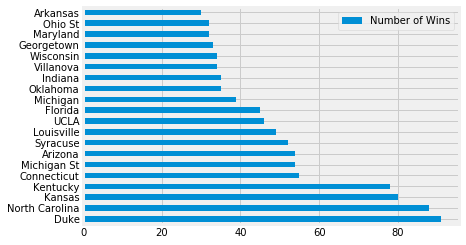

In [132]:
df_winners = df_compact_results.drop(labels=['DayNum', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT'], axis=1)
def ID2Name(ID):
    return df_teams[df_teams.TeamID == ID].TeamName.values[0]
df_winners['WTeamName'] = df_winners.WTeamID.apply(ID2Name)
df_winners = df_winners.drop(labels=['Season', 'WTeamID'], axis=1)
df_winners = df_winners.apply(pd.value_counts).rename({'WTeamName': 'Number of Wins'}, axis='columns')
df_winners.head(n=20).plot.barh()